#01 Data Collection and Preprocessing:

Collect a labeled dataset containing images of products with various defects. Ensure that each image is labeled with the corresponding defect class.
Preprocess the images, which may include resizing, normalization, and augmentation to enhance the diversity of the dataset.

In [ ]:
# Step 1: Import Libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1.0 Data Folder

image_dir = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image'
mask_dir = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask'

## Check data distribution (DONE)

Class distribution for the Test folder:


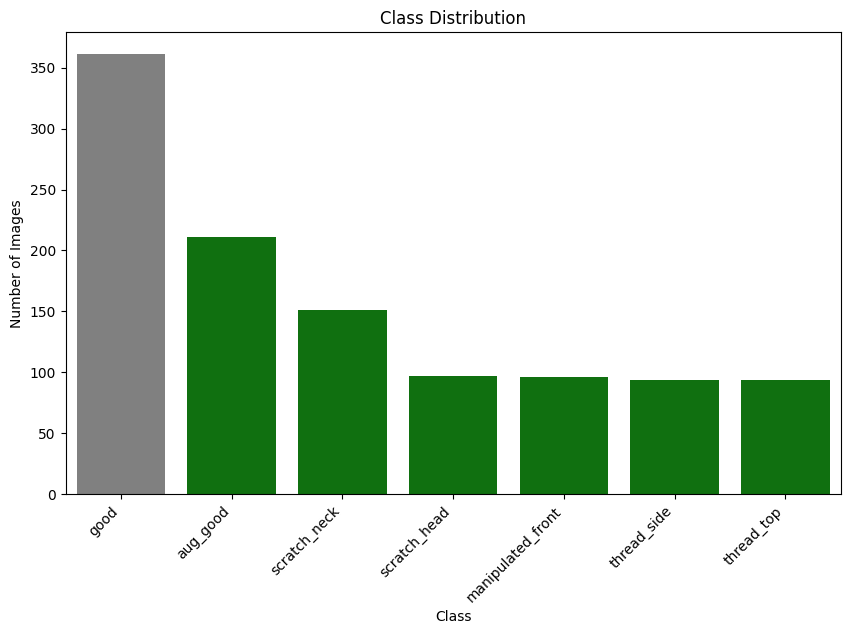

Class distribution for the Ground Truth folder:


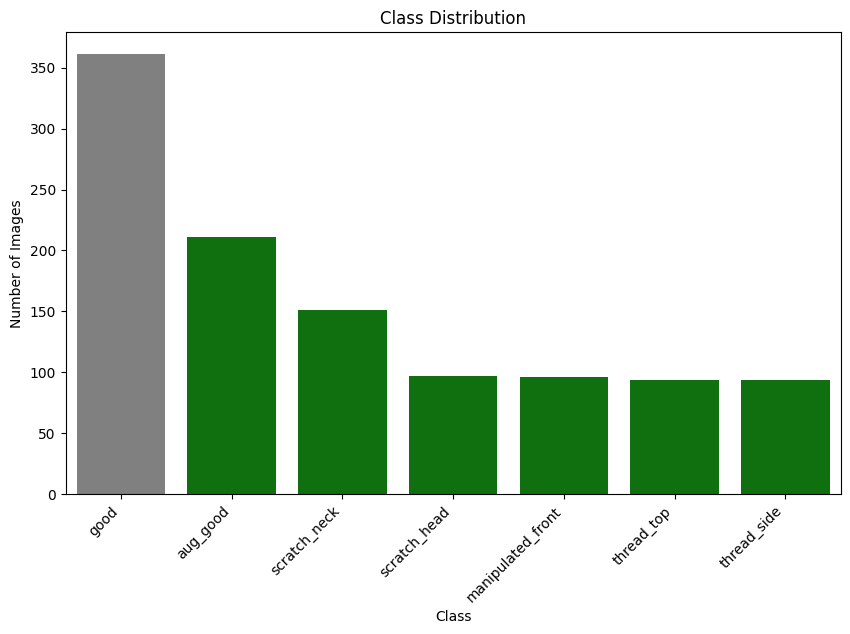

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(folder_path):
    # Get class names, excluding system files like .DS_Store
    class_names = [class_name for class_name in os.listdir(folder_path) if not class_name.startswith('.DS_Store')]

    # Count the number of images in each class
    class_counts = [len(os.listdir(os.path.join(folder_path, class_name))) for class_name in class_names]


    # Create a color map for each class
    class_colors = {
        'defect_scratch_neck': 'orange',
        'defect_manipualted_front': 'green',
        'defect_scratch_head': 'red',
        'defect_thread_top': 'purple',
        'defect_thread_side': 'brown',
        'good': 'gray'
    }

    # Sort class names based on counts in descending order
    sorted_indices = sorted(range(len(class_counts)), key=lambda k: class_counts[k], reverse=True)
    class_names = [class_names[i] for i in sorted_indices]
    class_counts = [class_counts[i] for i in sorted_indices]


    # Plot the class distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_names, y=class_counts, palette=[class_colors.get(class_name, 'green') for class_name in class_names])

    # Rotate x-axis labels by 45 degrees
    plt.xticks(rotation=45, ha='right')

    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.show()


# Plot class distribution for the Test folder
print("Class distribution for the Test folder:")
plot_class_distribution(image_dir)

# Plot class distribution for the Ground Truth folder
print("Class distribution for the Ground Truth folder:")
plot_class_distribution(mask_dir)


In [ ]:
# import os
# import random
# import shutil

# def delete_random_images_and_masks(image_folder, mask_folder, deletion_percentage):
#     # Get a list of all image files in the specified folder
#     image_files = os.listdir(image_folder)

#     # Calculate the number of files to delete based on the deletion percentage
#     num_files_to_delete = int(len(image_files) * deletion_percentage)

#     # Randomly select files to delete
#     files_to_delete = random.sample(image_files, num_files_to_delete)

#     for file_name in files_to_delete:
#         # Construct the file paths for image and mask
#         image_path = os.path.join(image_folder, file_name)
#         mask_name = file_name.replace("aug_", "").replace(".png", "_mask.png")
#         mask_path = os.path.join(mask_folder, mask_name)

#         # Delete the image file
#         os.remove(image_path)

#         # Delete the corresponding mask file
#         os.remove(mask_path)

# if __name__ == "__main__":
#     # Set the folder paths and deletion percentage
#     image_folder_path = "/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image/aug_good"
#     mask_folder_path = "/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask/aug_good"
#     deletion_percentage = 0.5  # Change this value to the desired deletion percentage

#     # Call the function to delete random images and masks
#     delete_random_images_and_masks(image_folder_path, mask_folder_path, deletion_percentage)


## Import


In [ ]:
import os
import glob
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Preprocess:


*   Create mask for good image
*   List item



## create mask for good image(DONE)

In [ ]:
# import os
# import tensorflow as tf
# from PIL import Image

# # Specify the path to the raw data
# raw_data_folder = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data'
# good_image_folder = os.path.join(raw_data_folder, 'image', 'good')
# mask_folder = os.path.join(raw_data_folder, 'mask')

# # Ensure the 'good' mask folder exists, create if not
# good_mask_folder = os.path.join(mask_folder, 'good')
# os.makedirs(good_mask_folder, exist_ok=True)

# # Function to create masks for good images
# def create_masks_for_good_images(good_image_folder, good_mask_folder):
#     good_image_files = os.listdir(good_image_folder)
#     good_mask_files = os.listdir(good_mask_folder)

#     # Print the filenames in each folder
#     print("Good Image Files:")
#     print(good_image_files)
#     print("\nGood Mask Files:")
#     print(good_mask_files)

#     # Check for missing files
#     missing_files = set(good_image_files) - set(good_mask_files)
#     if missing_files:
#         print("\nMissing Mask Files:")
#         print(missing_files)
#         print("\nNumber of Missing Mask Files:", len(missing_files))
#     else:
#         print("\nNo missing mask files.")

# # Create masks for good images
# create_masks_for_good_images(good_image_folder, good_mask_folder)


##Undersampling good class

In [ ]:
# import os
# import glob
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from PIL import Image

# # Specify the main folder and paths
# main_folder = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation'
# raw_data_folder = os.path.join(main_folder, 'raw_data')
# image_folder = os.path.join(raw_data_folder, 'image')
# mask_folder = os.path.join(raw_data_folder, 'mask')
# augmented_image_folder = os.path.join(raw_data_folder, 'image', 'aug_good')
# augmented_mask_folder = os.path.join(raw_data_folder, 'mask', 'aug_good')

# # Create the augmented image and mask folders if they don't exist
# os.makedirs(augmented_image_folder, exist_ok=True)
# os.makedirs(augmented_mask_folder, exist_ok=True)

# # Initialize image_files and mask_files at a global scope
# image_files, mask_files = [], []

# # Undersample the good class
# good_undersample_factor = 0.6
# good_image_paths = glob.glob(os.path.join(image_folder, 'good', '*.png'))
# good_mask_paths = glob.glob(os.path.join(mask_folder, 'good', '*.png'))

# # Print the number of original files for the 'good' class
# print(f"Original number of 'good' image files: {len(good_image_paths)}")
# print(f"Original number of 'good' mask files: {len(good_mask_paths)}")

# # Undersample the 'good' class
# undersampled_good_image_paths = np.random.choice(good_image_paths, size=int(good_undersample_factor * len(good_image_paths)), replace=False)
# undersampled_good_mask_paths = [path.replace('image', 'mask') for path in undersampled_good_image_paths]

# # Print the number of undersampled files for the 'good' class
# print(f"Undersampled 'good' image files: {len(undersampled_good_image_paths)}")
# print(f"Undersampled 'good' mask files: {len(undersampled_good_mask_paths)}")

# # Configure data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Perform data augmentation and save the augmented images
# for image_path, mask_path in zip(undersampled_good_image_paths, undersampled_good_mask_paths):
#     img = tf.keras.preprocessing.image.load_img(image_path)
#     img_array = tf.keras.preprocessing.image.img_to_array(img)
#     img_array = img_array.reshape((1,) + img_array.shape)

#     # Determine the corresponding augmented save paths
#     image_name = os.path.basename(image_path)
#     save_to_image_path = os.path.join(augmented_image_folder, f"aug_{image_name}")

#     i = 0
#     for batch in datagen.flow(img_array, batch_size=1, save_to_dir=augmented_image_folder, save_prefix='aug', save_format='png'):
#         i += 1
#         if i >= 1:  # Adjust the number of augmentations as needed
#             break

# # Create masks for the augmented images in the 'aug_good' folder
# for augmented_image_path in glob.glob(os.path.join(augmented_image_folder, '*.png')):
#     # Determine the corresponding mask path
#     mask_name = os.path.basename(augmented_image_path).replace('aug_', '').replace('.png', '_mask.png')
#     save_to_mask_path = os.path.join(augmented_mask_folder, mask_name)

#     # Create a simple mask (you might need a more sophisticated method depending on your specific case)
#     mask = Image.new('L', (img_array.shape[1], img_array.shape[2]), 0)
#     mask.save(save_to_mask_path)

# # Display total number of image and mask files
# total_image_files = len(glob.glob(os.path.join(augmented_image_folder, '*.png')))
# total_mask_files = len(glob.glob(os.path.join(augmented_mask_folder, '*.png')))
# print(f"Total augmented image files: {total_image_files}")
# print(f"Total augmented mask files: {total_mask_files}")


##oversampling defect class (DONE)

In [ ]:
# image_dir

In [ ]:
# def oversample_defect_classes(image_dir, mask_dir, defect_classes, oversample_factor):
#     global image_files, mask_files  # Use the global variables
#     defect_classes = ['scratch_head', 'thread_side', 'scratch_neck', 'manipulated_front', 'thread_top']
#     for defect_class in defect_classes:
#         image_class_path = os.path.join(image_dir, defect_class)
#         mask_class_path = os.path.join(mask_dir, defect_class)

#         print(f"Contents of {defect_class} image directory: {os.listdir(image_class_path)}")
#         print(f"Contents of {defect_class} mask directory: {os.listdir(mask_class_path)}")

#         defect_image_paths = glob.glob(os.path.join(image_class_path, '*.png'))
#         defect_mask_paths = glob.glob(os.path.join(mask_class_path, '*.png'))


#         # Create directories if they don't exist
#         save_to_dir = os.path.join(image_dir, defect_class)
#         save_to_mask_dir = os.path.join(mask_dir, defect_class)
#         os.makedirs(save_to_dir, exist_ok=True)
#         os.makedirs(save_to_mask_dir, exist_ok=True)

#         # Randomly sample a subset of defect images for augmentation
#         sampled_defect_images = np.random.choice(defect_image_paths, size=int(defect_oversample_factor * len(defect_image_paths)), replace=True)

#         print(f"Defect class: {defect_class}")
#         print(f"Number of original defect images: {len(defect_image_paths)}")
#         print(f"Number of sampled defect images: {len(sampled_defect_images)}")
# defect_oversample_factor = 3
# defect_classes = ['scratch_head', 'thread_side', 'scratch_neck', 'manipulated_front', 'thread_top']
# # Oversample the defect classes
# oversample_defect_classes(image_dir, mask_dir, defect_classes, defect_oversample_factor)


In [ ]:
# from PIL import Image
# from tqdm import tqdm

# def create_mask_for_defects(image_folder, mask_folder):
#     defect_classes = ['scratch_head', 'thread_side', 'scratch_neck', 'manipulated_front', 'thread_top']

#     for defect_class in defect_classes:
#         image_paths = glob.glob(os.path.join(image_folder, defect_class, '*.png'))
#         mask_paths = glob.glob(os.path.join(mask_folder, defect_class, '*.png'))

#         for image_path in tqdm(image_paths, desc=f"Creating masks for {defect_class}"):
#             image_filename = os.path.basename(image_path)
#             mask_path = os.path.join(mask_folder, defect_class, image_filename.replace('.png', '_mask.png'))

#             if mask_path not in mask_paths:
#                 # Create a dummy mask (all white) since the actual mask creation process may vary
#                 dummy_mask = Image.new('L', (512, 512), color=255)
#                 dummy_mask.save(mask_path)

#                 print(f"Created mask for {image_path}")

# # Specify the image and mask folders
# image_folder = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image'
# mask_folder = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask'

# # Call the function to create masks for defect images
# create_mask_for_defects(image_folder, mask_folder)


#Summary and visualization

In [ ]:
# import os

# # Specify the path to the raw data folder
# main_folder = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation'
# raw_data_path = os.path.join(main_folder, 'raw_data')

# # Initialize image_files and mask_files
# image_files, mask_files = [], []

# # Iterate over subfolders in raw_data/image
# image_folder_path = os.path.join(raw_data_path, 'image')
# for subfolder in os.listdir(image_folder_path):
#     subfolder_path = os.path.join(image_folder_path, subfolder)
#     if os.path.isdir(subfolder_path):
#         # Add all image files in the subfolder to image_files list
#         image_files.extend([os.path.join(subfolder_path, file) for file in os.listdir(subfolder_path) if file.endswith('.png')])

# # Iterate over subfolders in raw_data/mask
# mask_folder_path = os.path.join(raw_data_path, 'mask')
# for subfolder in os.listdir(mask_folder_path):
#     subfolder_path = os.path.join(mask_folder_path, subfolder)
#     if os.path.isdir(subfolder_path):
#         # Add all mask files in the subfolder to mask_files list
#         mask_files.extend([os.path.join(subfolder_path, file) for file in os.listdir(subfolder_path) if file.endswith('.png')])

# # Print the combined lists
# print("Image Files:")
# print(image_files)

# print("\nMask Files:")
# print(mask_files)



In [ ]:
# Summarize the number of images for each class
class_folders = os.listdir(image_dir)

for class_name in class_folders:
    class_image_paths = glob.glob(os.path.join(image_dir, class_name, '*.png'))
    class_mask_paths = glob.glob(os.path.join(mask_dir, class_name, '*.png'))

    num_image_files = len(class_image_paths)
    num_mask_files = len(class_mask_paths)

    print(f"{class_name}: {num_image_files} image files, {num_mask_files} mask files")

# # Total number of image and mask files
# total_image_files = len(image_files)
# total_mask_files = len(mask_files)
# print(f"\nTotal image files: {total_image_files}")
# print(f"Total mask files: {total_mask_files}")


.DS_Store: 0 image files, 0 mask files
scratch_head: 97 image files, 97 mask files
thread_side: 94 image files, 94 mask files
scratch_neck: 151 image files, 151 mask files
manipulated_front: 96 image files, 96 mask files
good: 361 image files, 361 mask files
thread_top: 94 image files, 94 mask files
aug_good: 211 image files, 211 mask files


###To find it's match

In [ ]:
import os

# Specify the path to the raw data folder
raw_data_path = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data'

# Specify the folder names
image_folder_name = 'scratch_neck'
mask_folder_name = 'scratch_neck'

# Function to extract base names without prefixes and suffixes
def extract_base_name(file_name, prefix, suffix):
    return file_name[len(prefix):-len(suffix)] if file_name.startswith(prefix) and file_name.endswith(suffix) else None

# Get the list of image files and mask files
image_files = os.listdir(os.path.join(raw_data_path, 'image', image_folder_name))
mask_files = os.listdir(os.path.join(raw_data_path, 'mask', mask_folder_name))

# Extract base names without prefixes and suffixes
image_base_names = [extract_base_name(file, 'aug_', '.png') for file in image_files]
mask_base_names = [extract_base_name(file, '', '_mask.png') for file in mask_files]

# Find the file that doesn't have a pair
unpaired_file = next((file for file in image_base_names if file not in mask_base_names), None)

# Print the unpaired file
if unpaired_file:
    print("The unpaired file is:", f'aug_{unpaired_file}.png')
else:
    print("All files have pairs.")


All files have pairs.


In [ ]:
# import os

# # Specify the path to the raw data folder
# raw_data_path = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data'

# # Specify the folder names
# image_folder_name = 'scratch_neck'
# mask_folder_name = 'scratch_neck'

# # Function to list all files in a folder
# def list_files(folder_path):
#     return sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path)])

# # Get the list of image files and mask files
# image_files = list_files(os.path.join(raw_data_path, 'image', image_folder_name))
# mask_files = list_files(os.path.join(raw_data_path, 'mask', mask_folder_name))

# # Pair the names of mask and image files together and print them
# for image_file, mask_file in zip(image_files, mask_files):
#     print("Image File:", image_file)
#     print("Mask File:", mask_file)
#     print()


In [ ]:
# import os

# # Specify the path to the raw data folder
# raw_data_path = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data'

# # Specify the folder names
# image_folder_name = 'scratch_neck'
# mask_folder_name = 'scratch_neck'

# # Function to list all files in a folder
# def list_files(folder_path):
#     return [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

# # Get the list of image files and mask files
# image_files = list_files(os.path.join(raw_data_path, 'image', image_folder_name))
# mask_files = list_files(os.path.join(raw_data_path, 'mask', mask_folder_name))

# # Print the lists of files
# print("Image Files:")
# for image_file in image_files:
#     print(image_file)

# print("\nMask Files:")
# for mask_file in mask_files:
#     print(mask_file)


## Visualize after datagen

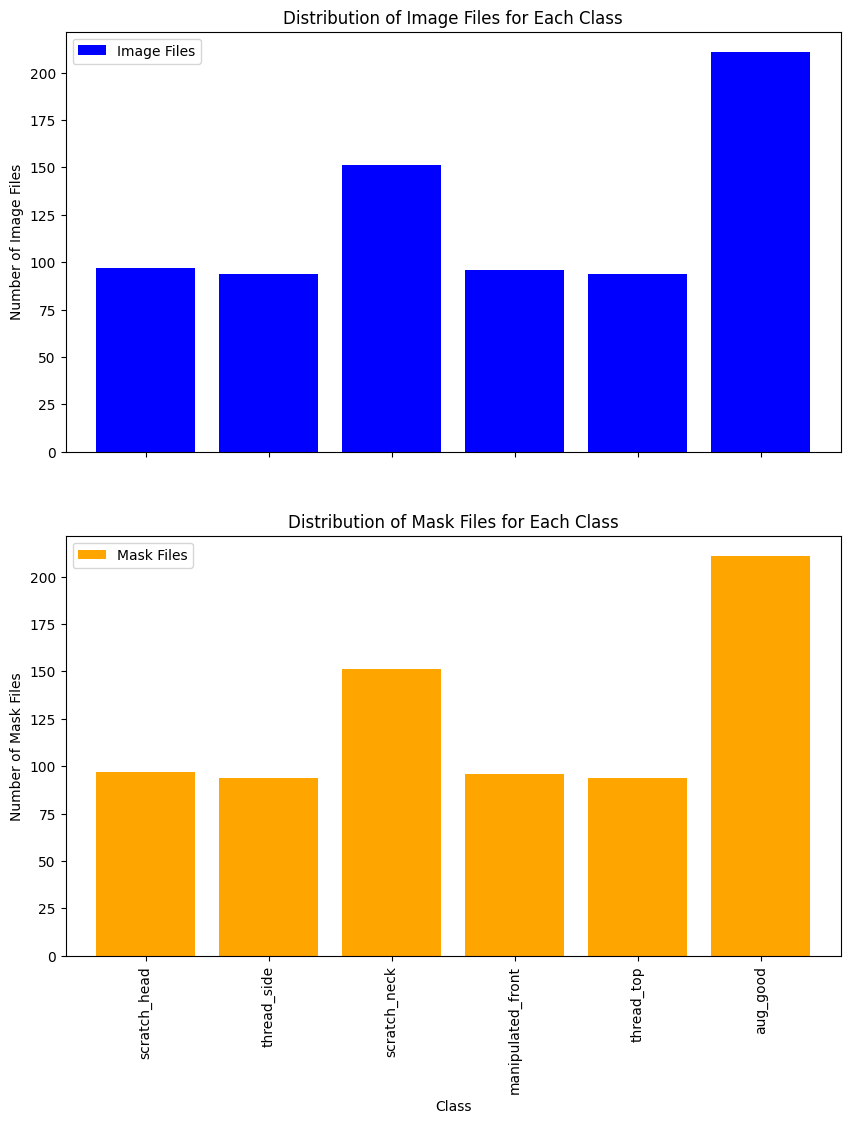

In [ ]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Specify the image and mask folders

image_folder = os.path.join(raw_data_path, 'image')
mask_folder = os.path.join(raw_data_path, 'mask')

# Exclude '.DS_Store' and 'good' folder
class_names = [class_name for class_name in os.listdir(image_folder) if class_name not in ['.DS_Store', 'good']]

# Collect the file counts for each class
num_image_files = [len(glob.glob(os.path.join(image_folder, class_name, '*.png'))) for class_name in class_names]
num_mask_files = [len(glob.glob(os.path.join(mask_folder, class_name, '*.png'))) for class_name in class_names]

# Create a DataFrame for easy plotting
data = {'Class': class_names, 'Image Files': num_image_files, 'Mask Files': num_mask_files}
df = pd.DataFrame(data)

# Plotting two separate graphs for image and mask files
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plotting image files
df.plot(kind='bar', x='Class', y='Image Files', ax=axs[0], color='blue', width=0.8)
axs[0].set_title('Distribution of Image Files for Each Class')
axs[0].set_ylabel('Number of Image Files')

# Plotting mask files
df.plot(kind='bar', x='Class', y='Mask Files', ax=axs[1], color='orange', width=0.8)
axs[1].set_title('Distribution of Mask Files for Each Class')
axs[1].set_ylabel('Number of Mask Files')

# Display the plots
plt.show()


##Define load and preprocess data

In [ ]:
# import os
# import glob
# import tensorflow as tf
# import numpy as np

# def load_and_preprocess_data(main_folder, class_name, batch_size, target_size, defect_labels_mapping):
#     print(f"Processing class: {class_name}")
#     # Create a list of image file paths
#     image_folder = os.path.join(main_folder, 'image', class_name)
#     mask_folder = os.path.join(main_folder, 'mask', class_name)

#     image_files = glob.glob(os.path.join(image_folder, '*.png'))
#     mask_files = glob.glob(os.path.join(mask_folder, '*.png'))

#     # Check if there are files in the folders
#     if not image_files or not mask_files:
#         raise ValueError(f"No files found in {image_folder} or {mask_folder}")

#     # Create a dataset of image and mask file paths
#     dataset = tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(image_files, dtype=tf.string), tf.convert_to_tensor(mask_files, dtype=tf.string)))

#     # Function to load and preprocess each image and mask pair
#     def load_and_preprocess(image_path, mask_path):
#         # Load image and mask
#         image = tf.io.read_file(image_path)
#         image = tf.image.decode_png(image, channels=3)
#         mask = tf.io.read_file(mask_path)
#         mask = tf.image.decode_png(mask, channels=1)

#         # Resize image and mask
#         image = tf.image.resize(image, target_size)
#         mask = tf.image.resize(mask, target_size)

#         # Normalize image to the range [0, 1]
#         image = tf.image.convert_image_dtype(image, dtype=tf.float32)

#         # Normalize mask to binary values (0 or 1)
#         mask = mask // 255

#         return image, mask

#     # Apply the load_and_preprocess function to each element in the dataset
#     dataset = dataset.map(load_and_preprocess)

#     # Batch and prefetch the dataset for improved performance
#     dataset = dataset.batch(batch_size)
#     dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

#     return dataset

# # Specify the main directory containing subfolders (Image and mask)
# main_folder = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data'

# # Mapping of folder names to labels
# defect_labels_mapping = {
#     'aug_good' : 0,
#     'scratch_neck': 1,
#     'manipulated_front': 2,
#     'scratch_head': 3,
#     'thread_top': 4,
#     'thread_side': 5,
# }

# # List of defect classes
# defect_classes = [
#     'aug_good',
#     'scratch_neck',
#     'manipulated_front',
#     'scratch_head',
#     'thread_top',
#     'thread_side',
# ]

# # Batch size and target size
# batch_size = 16
# target_size = (256, 256)


### processed good data

In [ ]:
# # Load and preprocess data for the 'good' class
# good_data = load_and_preprocess_data(main_folder, 'aug_good', batch_size, target_size, 0)

In [ ]:
# good_data

###processed defect data

In [ ]:

# # Load and preprocess data for each defect class
# defect_data = {}

# for defect_class in defect_classes[1:]:  # Skip 'good' class
#     defect_data[defect_class] = load_and_preprocess_data(main_folder, defect_class, batch_size, target_size, defect_labels_mapping)

# # Print keys and classes after populating processed_defect_data
# print("Defect class keys in processed_defect_data:", defect_data.keys())
# print("Defect classes:", defect_classes[1:])




In [ ]:
# import numpy as np


# # Combine defect_images and images into processed_images
# processed_images = np.concatenate([defect_images, images], axis=0)

# # Combine defect_masks and good_masks into processed_masks
# processed_masks = np.concatenate([defect_masks, good_masks], axis=0)


#Merged images and masks into dataset

In [ ]:
import os
import glob
import tensorflow as tf

def load_and_preprocess_data(main_folder, class_names, batch_size, target_size):
    processed_images = []
    processed_masks = []

    for class_name in class_names:
        print(f"Processing class: {class_name}")
        # Create a list of image file paths
        image_folder = os.path.join(main_folder, 'image', class_name)
        mask_folder = os.path.join(main_folder, 'mask', class_name)

        image_files = glob.glob(os.path.join(image_folder, '*.png'))
        mask_files = glob.glob(os.path.join(mask_folder, '*.png'))

        # Check if there are files in the folders
        if not image_files or not mask_files:
            raise ValueError(f"No files found in {image_folder} or {mask_folder}")

        # Load and preprocess each image and mask pair
        for image_path, mask_path in zip(image_files, mask_files):
            image, mask = load_and_preprocess(image_path, mask_path, target_size)

            processed_images.append(image)
            processed_masks.append(mask)

    # Convert lists to TensorFlow datasets
    processed_images_dataset = tf.data.Dataset.from_tensor_slices(processed_images)
    processed_masks_dataset = tf.data.Dataset.from_tensor_slices(processed_masks)

    # # Batch and prefetch the datasets for improved performance
    # processed_images_dataset = processed_images_dataset.batch(batch_size)
    # processed_images_dataset = processed_images_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    # processed_masks_dataset = processed_masks_dataset.batch(batch_size)
    # processed_masks_dataset = processed_masks_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return processed_images_dataset, processed_masks_dataset

def load_and_preprocess(image_path, mask_path, target_size):
    # Load image and mask
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)

    # Resize image and mask
    image = tf.image.resize(image, target_size)
    mask = tf.image.resize(mask, target_size)

    # Normalize image to the range [0, 1]
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)

    # Normalize mask to binary values (0 or 1)
    mask = mask // 255

    return image, mask

# Specify the main directory containing subfolders (Image and mask)
main_folder = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data'

# List of defect classes
defect_classes = [
    'aug_good',
    'scratch_neck',
    'manipulated_front',
    'scratch_head',
    'thread_top',
    'thread_side',
]

# Batch size and target size
batch_size = 16
target_size = (256, 256)

# Create the datasets
processed_images, processed_masks = load_and_preprocess_data(main_folder, defect_classes, batch_size, target_size)


Processing class: aug_good
Processing class: scratch_neck
Processing class: manipulated_front
Processing class: scratch_head
Processing class: thread_top
Processing class: thread_side


In [ ]:
processed_images

<_TensorSliceDataset element_spec=TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None)>

In [ ]:

import tensorflow as tf

# Assuming 'your_dataset' is your dataset
if isinstance(processed_masks, tf.data.Dataset):
    print("Your dataset is a TensorFlow dataset.")
    # You can proceed with TensorFlow dataset operations
else:
    print("Your dataset is not a TensorFlow dataset.")
    # You might need to convert it to a TensorFlow dataset or handle it differently


Your dataset is a TensorFlow dataset.


In [ ]:
import tensorflow as tf

# Convert processed_images to NumPy array
processed_images_np = np.array([item.numpy() for item in processed_images])
# Convert processed_masks to NumPy array
processed_masks_np = np.array([item.numpy() for item in processed_masks])

#02 Data 40%:

Divide your dataset into training, validation, and testing sets. This helps assess the model's performance on new, unseen data.

In [ ]:
# # Step 3: Load and Split Data
# import numpy as np

# # Make sure all images have the same dimensions
# all_good_data = [np.squeeze(img) for img in good_data]
# # Extract only 60% of the good images
# percentage_to_use = 0.6
# num_images_to_use = int(len(good_data) * percentage_to_use)

# # Update the code to use only 40% of the good images
# good_data = [np.squeeze(img)[:int(img.shape[0]*percentage_to_use), :int(img.shape[1]*percentage_to_use)] for img in all_good_data[:num_images_to_use]]


In [ ]:
# good_data = [np.squeeze(img) for img in good_data]
# defect_data = [np.squeeze(img) for img in defect_data]

# 03 Train-test-split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train, test, and validation sets
images_train, images_temp, masks_train, masks_temp = train_test_split(
    processed_images_np, processed_masks_np, test_size=0.2, random_state=42
)

images_val, images_test, masks_val, masks_test = train_test_split(
    images_temp, masks_temp, test_size=0.5, random_state=42
)

# Now you have images_train, masks_train for training,
# images_val, masks_val for validation, and
# images_test, masks_test for testing.


In [ ]:
# from sklearn.model_selection import train_test_split

# # Function to split a dataset into train, validation, and test sets
# def split_dataset(images, masks, validation_split=0.2, test_split=0.1):
#     # Split into training and remaining data
#     images_train, images_remaining, masks_train, masks_remaining = train_test_split(
#         images, masks, test_size=(validation_split + test_split), random_state=42
#     )

#     # Split remaining data into validation and test sets
#     images_val, images_test, masks_val, masks_test = train_test_split(
#         images_remaining, masks_remaining, test_size=test_split / (validation_split + test_split), random_state=42
#     )

#     return (images_train, masks_train), (images_val, masks_val), (images_test, masks_test)

# # Split the 'good' class dataset
# (good_images_train, good_masks_train), (good_images_val, good_masks_val), (good_images_test, good_masks_test) = split_dataset(
#     processed_good_images, processed_good_masks
# )

# # Split each defect class dataset
# defect_datasets_train, defect_datasets_val, defect_datasets_test = {}, {}, {}
# for defect_class in defect_classes[1:]:  # Skip 'good' class
#     (defect_datasets_train[defect_class], defect_datasets_val[defect_class], defect_datasets_test[defect_class]) = split_dataset(
#         processed_defect_images[defect_class], processed_defect_masks[defect_class]
#     )

# # Print the shapes of the resulting datasets
# print("Good Class Shapes:")
# print("Train:", good_images_train.shape, good_masks_train.shape)
# print("Validation:", good_images_val.shape, good_masks_val.shape)
# print("Test:", good_images_test.shape, good_masks_test.shape)
# print("---")
# for defect_class in defect_classes[1:]:
#     print(f"{defect_class} Class Shapes:")
#     print("Train:", defect_datasets_train[defect_class][0].shape, defect_datasets_train[defect_class][1].shape)
#     print("Validation:", defect_datasets_val[defect_class][0].shape, defect_datasets_val[defect_class][1].shape)
#     print("Test:", defect_datasets_test[defect_class][0].shape, defect_datasets_test[defect_class][1].shape)
#     print("---")


Model Selection:

Choose a suitable deep learning model architecture for your multiclass classification task. Convolutional Neural Networks (CNNs) are commonly used for computer vision tasks.

Model Design:

Design the architecture of your model.
The input layer should match the size of your preprocessed images, and the output layer should have as many nodes as the number of classes (defect types).
Loss Function:

Select a suitable loss function for multiclass classification.
Cross-entropy loss is commonly used in this context. >> use one-hot encoded
loss='sparse_categorical_crossentropy' >> use integer

Optimizer:

Choose an optimizer (e.g., Adam, SGD) to update the model's weights during training.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
import numpy as np
import torch
import torchvision.models as models

In [ ]:
def unet_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Expansive path
    up3 = layers.UpSampling2D(size=(2, 2))(conv3)
    concat3 = layers.concatenate([conv2, up3], axis=-1)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(concat3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.UpSampling2D(size=(2, 2))(conv8)
    concat9 = layers.concatenate([conv1, up9], axis=-1)
    conv10 = layers.Conv2D(num_classes, 1, activation='softmax')(concat9)

    model = tf.keras.Model(inputs=inputs, outputs=conv10)
    return model

# Define input shape and number of classes
input_shape = (256, 256, 3)
num_classes = 6
train_classes = [0,1,2,3,4,5]

# Create the UNet model for multiclass segmentation
model = unet_model(input_shape, num_classes)


# Assuming 'train_classes' is an array of class labels in your training dataset
class_weights = compute_class_weight( class_weight = "balanced",
                                      classes = np.unique(train_classes),
                                      y = train_classes )
class_weights = dict(zip(np.unique(train_classes), class_weights))


def compute_iou(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.math.round(y_pred), tf.float32)

    intersection = tf.reduce_sum(tf.multiply(y_true, y_pred))
    union = tf.reduce_sum(tf.add(y_true, y_pred)) - intersection

    iou = (intersection + 1e-15) / (union + 1e-15)

    return iou

def iou_loss(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true + y_pred - y_true * y_pred, axis=[1, 2, 3])
    iou = tf.reduce_mean((intersection + 1e-15) / (union + 1e-15), axis=0)
    return 1 - iou




In [ ]:
# Compile the model
learning_rate = 0.001
num_epochs = 1
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=iou_loss, metrics=['accuracy', compute_iou])


In [ ]:

# Assuming 'images_train' and 'masks_train' are your training data
history = model.fit(images_train, masks_train, validation_data = (images_val, masks_val), epochs=num_epochs, class_weight=class_weights)
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]


In [ ]:


# # Example: Load your training data (images and masks) here
# # Replace this with your actual data loading code
# train_images = images_train
# train_masks = masks_train

# # Example: Iterate through epochs and batches
# epochs = 1
# batch_size = 16

# for epoch in range(epochs):
#     print(f"Epoch {epoch + 1}/{epochs}")

#     for step in range(0, len(train_images), batch_size):
#         batch_images = train_images[step:step + batch_size]
#         batch_masks = train_masks[step:step + batch_size]

#         # Train the model on the batch
#         model.train_on_batch(batch_images, batch_masks)

#         # Assuming you have a validation set, you can compute IOU on it
#         # Example: Load your validation data (val_images and val_masks) here
#         # Replace this with your actual data loading code
#         val_images = images_val
#         val_masks = masks_val

#         # Evaluate the model on the validation set and get the IOU value
#         val_iou = model.evaluate(val_images, val_masks, verbose=0)[2]  # Assuming IOU is the third metric

#         print(f"Step {step}/{len(train_images)}, Validation IOU: {val_iou}")

# Now you have the list of IOU values during training.
# Depending on your training loop structure, you might want to store them in a list or another suitable data structure.

#model.fit(images_train, masks_train, validation_data=(images_val, masks_val), epochs=num_epochs, batch_size=batch_size)

In [ ]:
# Evaluate the model using IoU (Intersection over Union) as the metric
test_loss, test_accuracy, test_iou = model.evaluate(images_test, masks_test)

In [ ]:
model.save('/content/model.h5')

Training:

Train the model using the training set. Adjust the hyperparameters such as learning rate, batch size, and the number of epochs to achieve good performance. Monitor the training process using the validation set to avoid overfitting.

# New section

In [ ]:


# Example usage for IoU during evaluation
test_loss, test_accuracy, test_iou = model.evaluate(images_test, masks_test)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test IoU: {test_iou:.4f}')

In [ ]:
import tensorflow as tf
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing import image

def load_mask(mask_path):
    # Example: Assuming the mask image is in the same directory with '_mask' suffix
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if mask is None or mask.size == 0:
        raise ValueError(f"Error loading mask from path: {mask_path}")

    return mask


def compute_iou(y_true, y_pred):
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    return intersection / union

def tf_visualize_segmentation(model, image_path, mask_path, iou_threshold=0.5):
    # Load the image
    img = image.load_img(image_path, target_size=(256, 256))
    image_array = image.img_to_array(img)
    image_array = image_array / 255.0  # Normalize the pixel values to [0, 1]

    # Convert NumPy array to TensorFlow tensor outside @tf.function
    image_tensor = tf.convert_to_tensor(np.expand_dims(image_array, axis=0), dtype=tf.float32)

    # Make predictions using your model
    @tf.function
    def predict_fn(image_tensor):
        return model(image_tensor)

    predictions = predict_fn(image_tensor)

    # Load the ground truth mask
    ground_truth_mask = load_mask(mask_path)

    # Apply softmax thresholding to create a binary mask for each class
    softmax_thresholded = (predictions > 0.5).numpy().astype(np.uint8)

    # Resize the predicted mask to match the ground truth mask size
    softmax_thresholded_resized = cv2.resize(softmax_thresholded[0, :, :, 0], (ground_truth_mask.shape[1], ground_truth_mask.shape[0]))

    # Check if contours are not None
    contours, _ = cv2.findContours(softmax_thresholded_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours is not None and len(contours) > 0:
        # Compute IoU
        iou = compute_iou(ground_truth_mask, softmax_thresholded_resized)

        # Draw bounding box if IoU is above the threshold
        if iou > iou_threshold:
            for contour in contours:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(image_array, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Visualize the result using cv2_imshow
    cv2_imshow(cv2.cvtColor(image_array.astype(np.uint8), cv2.COLOR_RGB2BGR))

# Test the model on
new_image_path = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/Image/scratch_neck/007.png'
mask_path = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/mask/scratch_neck/007_mask.png'
tf_visualize_segmentation(trained_model, new_image_path, mask_path)


In [ ]:
import cv2
import numpy as np

def compute_iou(predicted_mask, ground_truth_mask):
    intersection = np.logical_and(predicted_mask, ground_truth_mask)
    union = np.logical_or(predicted_mask, ground_truth_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# Load the image
image_path = r'/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/Image/scratch_neck/007.png'
image = cv2.imread(image_path)

# Assuming you have a function to load the ground truth mask, modify this accordingly
ground_truth_mask_path = image_path.replace('.png', '_mask.png')
ground_truth_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)

# Assuming softmax_thresholded is your predicted mask
softmax_thresholded = (predictions > 0.2).numpy().astype(np.uint8)

# Resize the predicted mask to match the ground truth mask size
softmax_thresholded_resized = cv2.resize(softmax_thresholded, (ground_truth_mask.shape[1], ground_truth_mask.shape[0]))

# Compute IoU
iou = compute_iou(softmax_thresholded_resized, ground_truth_mask)
print(f'IoU for the image: {iou}')


# Visualization

In [ ]:
from google.colab.patches import cv2_imshow
import cv2


# Path to the image
path = r'/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/Image/scratch_neck/007.png'

# Reading the image
image = cv2.imread(path)

# List of IOU values for each detected bounding box - replace with your actual values
iou_values = [0.8, 0.5, 0.6, 0.9]

# Threshold for considering a bounding box as a defect
iou_threshold = 0.7

# Blue color in BGR
color = (255, 0, 0)

# Line thickness of 2 px
thickness = 2

# List of bounding box coordinates (x_min, y_min, x_max, y_max) for selected defects
selected_boxes = []

# Iterate through the bounding boxes and select those with IOU values above the threshold
for i, iou in enumerate(iou_values):
    if iou > iou_threshold:
        # Replace these with the actual coordinates of the bounding box from your model's output
        bbox = (10 * (i + 1), 20 * (i + 1), 100 * (i + 1), 150 * (i + 1))
        selected_boxes.append(bbox)
        start_point = (bbox[0], bbox[1])
        end_point = (bbox[2], bbox[3])
        image = cv2.rectangle(image, start_point, end_point, color, thickness)

# Display the image with bounding boxes
cv2_imshow(image)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_defect_detection(original_image, mask, predicted_mask):
    num_channels = predicted_mask.shape[-1]
    num_subplots = num_channels + 2  # Original image, ground truth mask, and each channel of predicted mask

    # Adjust the figure size based on the number of subplots
    plt.figure(figsize=(5 * num_subplots, 5))

    # Display the original image
    plt.subplot(1, num_subplots, 1)
    plt.imshow(original_image)
    plt.title('Original Image')

    # Display the ground truth mask
    plt.subplot(1, num_subplots, 2)
    plt.imshow(np.squeeze(mask), cmap='gray')
    plt.title('Ground Truth Mask')

    # Placeholder for predicted mask (replace this with your model prediction)
    predicted_mask_placeholder = np.random.rand(*predicted_mask.shape)

    # Display each channel of the predicted mask
    for i in range(num_channels):
        plt.subplot(1, num_subplots, i + 3)
        plt.imshow(predicted_mask_placeholder[:,:,i], cmap='gray')
        plt.title(f'Predicted Mask Channel {i + 1}')

    plt.show()

# Example usage
index = 1  # Choose the index of the sample you want to visualize
original_image = images_val[index]
ground_truth_mask = masks_val[index]

# Placeholder for the predicted mask (replace this with your model prediction)
predicted_mask_placeholder = np.random.rand(256, 256, 6)

visualize_defect_detection(original_image, ground_truth_mask, predicted_mask_placeholder)


In [ ]:

# importing cv2
import cv2

# path
path = r'C:\Users\Rajnish\Desktop\geeksforgeeks\geeks.png'

# Reading an image in default mode
image = cv2.imread(path)

# Window name in which image is displayed
window_name = 'Image'

# Start coordinate, here (5, 5)
# represents the top left corner of rectangle
start_point = (5, 5)

# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (220, 220)

# Blue color in BGR
color = (255, 0, 0)

# Line thickness of 2 px
thickness = 2

# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(image, start_point, end_point, color, thickness)

# Displaying the image
cv2.imshow(window_name, image)

In [ ]:
from PIL import Image
import io

def is_valid_image(image):
    try:
        Image.open(image).verify()
        return True
    except Exception as e:
        print(f"Invalid image: {e}")
        return False

In [ ]:
from pathlib import Path


image_folder = Path("/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image/")
mask_folder = Path("/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask")

In [ ]:
mask_folder

PosixPath('/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask')

In [ ]:
corrupt_images = []
for file in image_folder.rglob("*.png"):
    mask_file = mask_folder / file.parent.stem / f"{file.stem}_mask.png"

    if not file.exists():
        corrupt_images.append((file, mask_file))


In [ ]:
corrupt_images

[]

In [ ]:
!rm /content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask/scratch_head/009_mask.png

'/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask/scratch_head/009_mask.png'


In [ ]:
import shutil
corrupt_images[0].unlink()